# CDalgs - correlations explorations on fsv dataset

There are examples of correlations between agents features.

Load libraries

In [1]:
using BSON, DataFrames
using LinRegOutliers, StatsBase
using Plots

Load dataset

In [2]:
dataset_a = BSON.load("data/dataset_a.bson")
data = dataset_a[:data_tensor].*(-1);
params = Matrix(dataset_a[:parameters]);

Normalise data

In [3]:
function normalise(d)
    z(s, μ, σ, ϵ) = (s - μ) / (σ + ϵ)
    for i=1:size(d)[2]
        tmp = d[:, i]
        d[:, i] = z.(tmp, mean(tmp), std(tmp), 10e-10)
    end
    return d
end

deflection = normalise(data[:, :, 1]);
loads = normalise(data[:, :, 2]);

for i=1:4
    params[:,i] .-= minimum(params[:,i])
    params[:,i] ./= maximum(params[:,i])
end


Plot with outliers filtering

In [4]:
function corroutliers(df::DataFrame, xlabel::String, ylabel::String)
    reg = createRegressionSetting(@formula(y~x), df)
    outliers = ccf(reg)["outliers"]
    p = plot(xlabel = xlabel, 
             ylabel = ylabel)
    scatter!(df[findall(x -> x ∉ outliers, 1:size(df)[1]), :x], 
             df[findall(x -> x ∉ outliers, 1:size(df)[1]), :y], 
             label = false)
    scatter!(df[findall(x -> x ∈ outliers, 1:size(df)[1]), :x], 
             df[findall(x -> x ∈ outliers, 1:size(df)[1]), :y], 
             color=:red, label = "outliers")
    return p
end

corroutliers (generic function with 1 method)

Show correlations

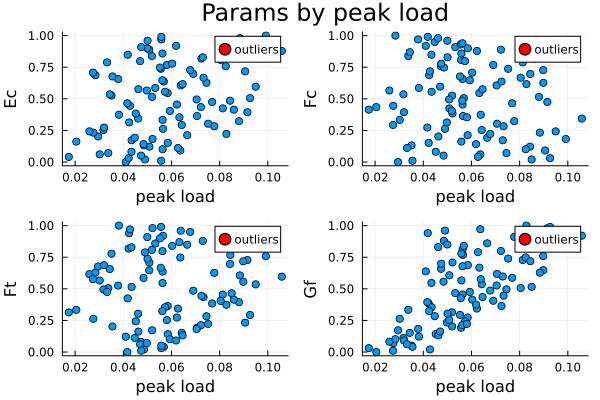

In [5]:
peak_load = []
for l in eachrow(data[:,:,2])
    append!(peak_load, maximum(l))
end

p1 = corroutliers(DataFrame(y=params[:, 1], x=peak_load), "peak load", "Ec")
p2 = corroutliers(DataFrame(y=params[:, 2], x=peak_load), "peak load", "Fc")
p3 = corroutliers(DataFrame(y=params[:, 3], x=peak_load), "peak load", "Ft")
p4 = corroutliers(DataFrame(y=params[:, 4], x=peak_load), "peak load", "Gf")

p = plot(p1, p2, p3, p4, layout=(2,2))#, xticks=(1, ""), yticks=(1, ""))
p[:plot_title] = "Params by peak load"
plot(p)

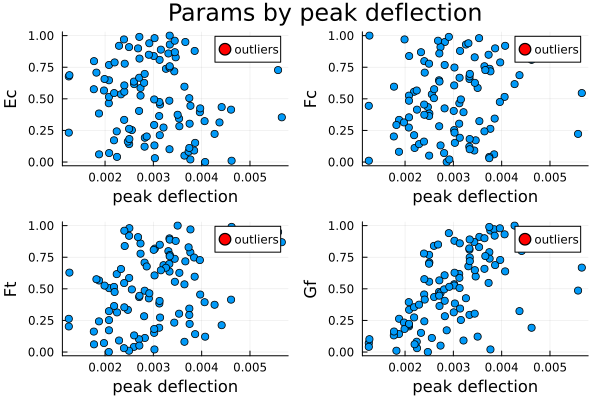

In [6]:
peak_load = []
for (l, d) in zip(eachrow(data[:,:,2]), eachrow(data[:,:,1]))
    append!(peak_load, d[argmax(l)])
end

p1 = corroutliers(DataFrame(y=params[:, 1], x=peak_load), "peak deflection", "Ec")
p2 = corroutliers(DataFrame(y=params[:, 2], x=peak_load), "peak deflection", "Fc")
p3 = corroutliers(DataFrame(y=params[:, 3], x=peak_load), "peak deflection", "Ft")
p4 = corroutliers(DataFrame(y=params[:, 4], x=peak_load), "peak deflection", "Gf")

p = plot(p1, p2, p3, p4, layout=(2,2))#, xticks=(1, ""), yticks=(1, ""))
p[:plot_title] = "Params by peak deflection"
plot(p)